<div style="color: red; font-size: larger; font-weight: 500; border: 20px solid red; padding: 1em;"><p>Some of the examples below do not work on this instance of sage-flatsurf since optional dependencies are missing 💥</p><p>Install all of flatsurf following the "install flatsurf" below 🚀</p></div>



# The flatsurf software suite

https://flatsurf.github.io/

To run this notebook, you need SageMath with the flatsurf suite properly installed.

## Install flatsurf

Run the [installer](https://github.com/flatsurf/sage-flatsurf/releases/tag/0.5.2) or have a look at our [documentation](https://flatsurf.github.io/sage-flatsurf/#installation).

How to get help

- ask (forum) at https://ask.sagemath.org/
- zulip (chat) at https://sagemath.zulipchat.com/ ([channel "polygon"](https://sagemath.zulipchat.com/#narrow/stream/271193-polygon) or [channel "CIRM-2023-09"](https://sagemath.zulipchat.com/#narrow/stream/403580-CIRM-2023-09))
- github repositories of the flatsurf projects https://github.com/flatsurf

## Defining Surfaces
see also [this section](https://flatsurf.github.io/sage-flatsurf/examples/defining_surfaces.html) in the documentation.

### Predefined Surfaces

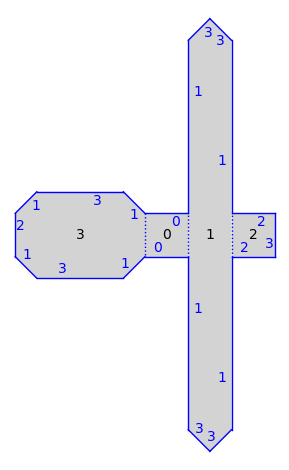

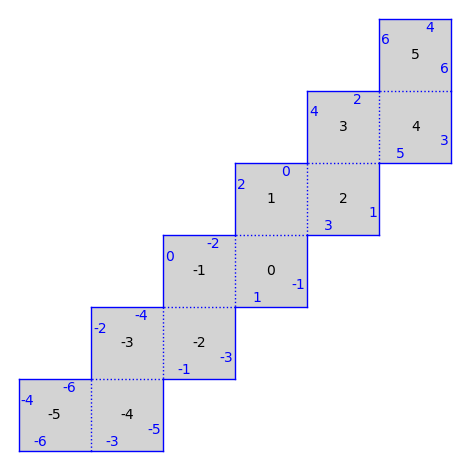

In [1]:
from flatsurf import translation_surfaces, similarity_surfaces, dilation_surfaces

translation_surfaces.cathedral(1, 4).plot().show()
translation_surfaces.infinite_staircase().plot().show()

### Building Surfaces from Polygons

Surfaces can be built by specifying a (finite) set of polygons and gluings between the sides of the polygons.

Once you call `set_immutable()`, the type of the surface is determined, here a translation surface:

Translation Surface in H_2(2) built from a square and a rectangle


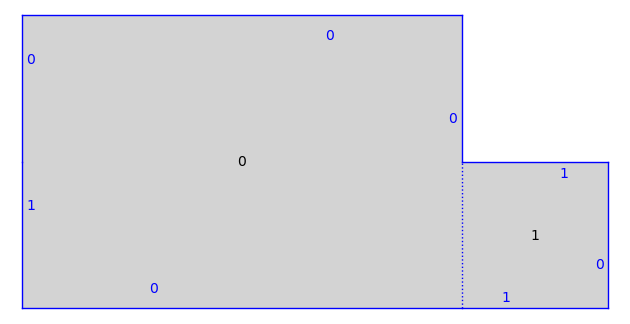

In [2]:
from flatsurf import MutableOrientedSimilaritySurface, Polygon

hexagon = Polygon(vertices=((0, 0), (3, 0), (3, 1), (3, 2), (0, 2), (0, 1)))
# hexagon.plot().show()

square = Polygon(vertices=((0, 0), (1, 0), (1, 1), (0, 1)))
# square.plot().show()

S = MutableOrientedSimilaritySurface(QQ)
S.add_polygon(hexagon)
S.add_polygon(square)

S.glue((0, 0), (0, 3))
S.glue((0, 1), (1, 3))
S.glue((0, 2), (0, 4))
S.glue((0, 5), (1, 1))
S.glue((1, 0), (1, 2))
S.set_immutable()
print(S)
S.plot()

We can also create a half-translation surface:

Half-Translation Surface in Q_1(2, -1^2) built from a square and a rectangle


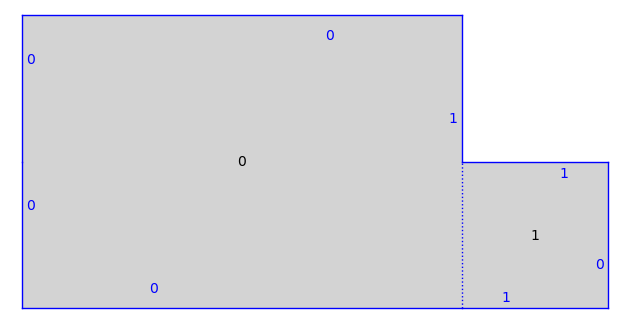

In [3]:
T = MutableOrientedSimilaritySurface.from_surface(S)
T.glue((1, 1), (0, 2))
T.glue((0, 4), (0, 5))
T.set_immutable()
print(T)
T.plot().show()

Or anything that can be built by gluing with similarities… (though the labeling is not overly helpful currently)

Genus 2 Surface built from a square and a rectangle


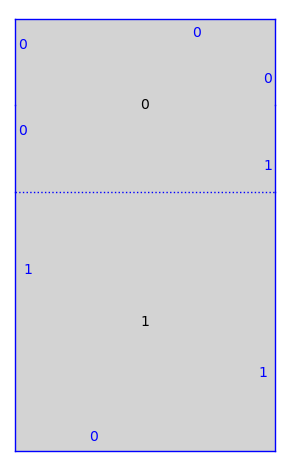

In [4]:
T = MutableOrientedSimilaritySurface.from_surface(S)
T.glue((0, 0), (1, 1))
T.glue((0, 5), (0, 3))
T.set_immutable()
print(T)
T.plot().show()

Or a surface with boundary, with self-gluings, …

### Billiards

see below at "Base Rings".

### Building Surfaces that are none of the Above

There is a relatively small contract that a surface needs to implement, things such as "what is on the other side of this edge?", "is this surface compact?", … so it is not hard to implement surfaces from scratch. See the documentation.

## Computing with Trajectories & Saddle Connections

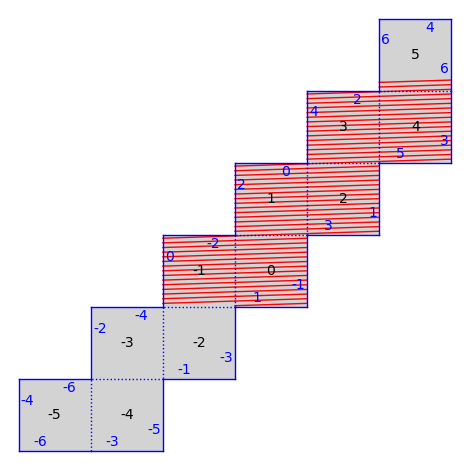

In [5]:
from flatsurf import translation_surfaces

S = translation_surfaces.infinite_staircase()
v = S.tangent_bundle()(0, (1/47, 1/49), (1, 1/31)).straight_line_trajectory()
v.flow(100)
v.plot(color='red') + S.plot()

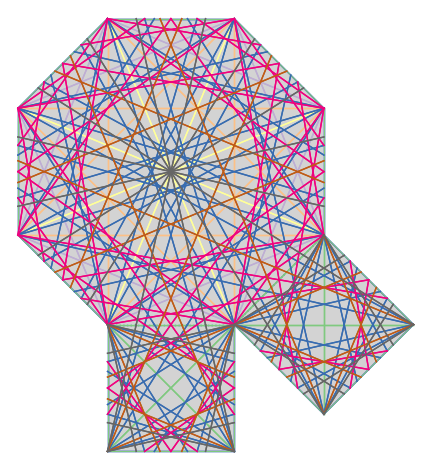

In [6]:
from flatsurf import translation_surfaces
S = translation_surfaces.octagon_and_squares()

connections = S.saddle_connections(squared_length_bound=100)
connections.sort(key=lambda c: c.length())

lengths = sorted(set(c.length() for c in connections))

def color(c):
    return colormaps.Accent(lengths.index(c.length()) / len(lengths))[:3]

S.plot(polygon_labels=False, edge_labels=False) + sum(sc.plot(color=color(sc)) for sc in connections)

## Base Rings

Most **exact** subrings of the reals from SageMath are supported, in particular $\mathbb{Q}$, NumberField and "exact reals".

In [9]:
from flatsurf import similarity_surfaces, Polygon
P = Polygon(angles=(3, 4, 13), vertices=[(0, 0), (1, 0)])
S = similarity_surfaces.billiard(P).minimal_cover(cover_type="translation")
print(f"{P.base_ring() = }")

# from ipyvue_flatsurf import Widget
# Widget(S).show()

P.base_ring() = Number Field in c0 with defining polynomial x^4 - 5*x^2 + 5 with c0 = 1.902113032590308?


In [10]:
from pyexactreal import ExactReals
R = ExactReals(P.base_ring())
almost_one = R.random_element(1)
print(f"{almost_one = }")

from flatsurf import similarity_surfaces, Polygon
Q = Polygon(angles=(3, 4, 13), vertices=[(0, 0), (almost_one, 0)])
S = similarity_surfaces.billiard(Q).minimal_cover(cover_type="translation")

ModuleNotFoundError: No module named 'pyexactreal'

## Flow Decompositions

We compute flow decompositions on the unfolding of the (2, 2, 5) triangle. We only run 4 iterations of decomposition algorithm initially which does not always manage to find all the cylinders there are:

In [19]:
from flatsurf import similarity_surfaces, Polygon, GL2ROrbitClosure
P = Polygon(angles=(2, 2, 5))
S = similarity_surfaces.billiard(P).minimal_cover(cover_type="translation")

O = GL2ROrbitClosure(S)
decompositions = iter(O.decompositions(bound=64, limit=4))

If you run this once and then run the cell below, you get a nice picture with 4 cylinders.

Run it again and you see one cylinder and one undetermined component. That component is going to decompose into three cylinders eventually. However, these components cannot be plotted since they are extremely long; the Widget loads all the intersections of the cylinders' boundary with half edges…

Run it a few more times to see a situation with two minimal components. Unfortunately, the widget struggles a bit to display minimal components and produces some gap artifacts.

In [38]:
decomposition = next(decompositions)
print(f"{decomposition = }")

decomposition = FlowDecomposition with 0 cylinders, 2 minimal components and 0 undetermined components


In [ ]:
from ipyvue_flatsurf import Widget
Widget(decomposition)

In [36]:
decomposition.decompose()
print(f"{decomposition = }")

decomposition = FlowDecomposition with 4 cylinders, 0 minimal components and 0 undetermined components


Here is a somewhat mysterious case. On the same surface, trying to decompose into a direction of a saddle connection, we can never certify that the components is minimal. (We ran this for a very long time and there really don't seem to be any cylinders out there.)

In [25]:
from flatsurf import similarity_surfaces, Polygon, GL2ROrbitClosure
P = Polygon(angles=(2, 2, 5))
S = similarity_surfaces.billiard(P).minimal_cover(cover_type="translation")

c = P.base_ring().gen()
direction = (12*c^4 - 60*c^2 + 56, 16*c^5 - 104*c^3 + 132*c)

O = GL2ROrbitClosure(S)
D = O.decomposition(direction, limit=1024)
print(f"{D = }")

D = O.decomposition(direction, limit=0)
iet = D.components()[0R].intervalExchangeTransformation()
print(f"{iet = }")

D = FlowDecomposition with 0 cylinders, 0 minimal components and 1 undetermined components
iet = [9: (28*c^5 - 148*c^3 + 160*c ~ 14.261238)] [14: (-64*c^5 + 356*c^3 - 412*c ~ 11.590863)] [12: (8*c^5 - 48*c^3 + 68*c ~ 4.3066573)] [22: (40*c^5 - 216*c^3 + 236*c ~ 0.074809782)] [21: (12*c^5 - 68*c^3 + 84*c ~ 1.5704962)] [19: (-116*c^5 + 644*c^3 - 744*c ~ 16.873760)] [26: (268*c^5 - 1500*c^3 + 1788*c ~ 4.3783334)] [24: (-248*c^5 + 1388*c^3 - 1652*c ~ 0.54856131)] [18: (40*c^5 - 216*c^3 + 236*c ~ 0.074809782)] [7: (16*c^5 - 88*c^3 + 104*c ~ 6.7127970)] / [7] [22] [24] [26] [19] [21] [18] [12] [14] [9]


## $SL_2(\mathbb{Z})$ orbits of square-tiled Surfaces

Square-tiled surfaces (also called origamis) are translation surfaces built from unit squares. Many properties of their $GL_2(\mathbb{R}$-orbit closures can be computed easily.

Note that the `Origami` object that we manipulate below are different from all other translation surfaces that were built above (that were using `sage-flatsurf`)

In [47]:
from surface_dynamics import Origami, OrigamiDatabase

In [48]:
o = Origami('(1,2)', '(1,3)')

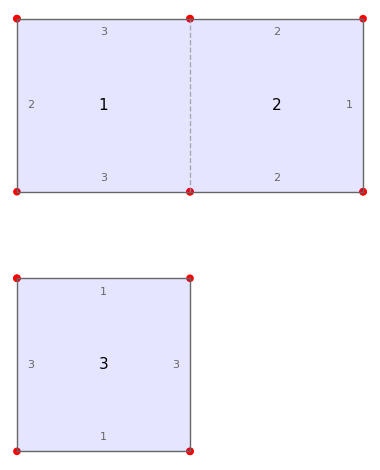

In [49]:
o.plot()

In [50]:
T = o.teichmueller_curve()

In [51]:
T.sum_of_lyapunov_exponents()

4/3

In [52]:
o.lyapunov_exponents_approx()

[0.333061251470008]

In [135]:
# as with sage-flatsurf translation surfaces we can get the stratum
o.stratum()

H_2(2)

In [136]:
# and we can even compute the stratum component
o.stratum_component()

H_2(2)^hyp

In [74]:
# There is a relatively big database of pre-computed arithmetic Teichmüller curves that can be querried
D = OrigamiDatabase()

In [19]:
# get the list of properties that are stored for each Teichmüller curves
D.cols()

['representative',
 'stratum',
 'component',
 'primitive',
 'quasi_primitive',
 'orientation_cover',
 'hyperelliptic',
 'regular',
 'quasi_regular',
 'genus',
 'nb_squares',
 'optimal_degree',
 'veech_group_index',
 'veech_group_congruence',
 'veech_group_level',
 'teich_curve_ncusps',
 'teich_curve_nu2',
 'teich_curve_nu3',
 'teich_curve_genus',
 'sum_of_L_exp',
 'L_exp_approx',
 'min_nb_of_cyls',
 'max_nb_of_cyls',
 'min_hom_dim',
 'max_hom_dim',
 'minus_identity_invariant',
 'monodromy_name',
 'monodromy_signature',
 'monodromy_index',
 'monodromy_order',
 'monodromy_solvable',
 'monodromy_nilpotent',
 'monodromy_gap_primitive_id',
 'relative_monodromy_name',
 'relative_monodromy_signature',
 'relative_monodromy_index',
 'relative_monodromy_order',
 'relative_monodromy_solvable',
 'relative_monodromy_nilpotent',
 'relative_monodromy_gap_primitive_id',
 'orientation_stratum',
 'orientation_genus',
 'pole_partition',
 'automorphism_group_order',
 'automorphism_group_name']

In [26]:
# get of summary of the content of the database
D.info()

genus 2
 H_2(2)^hyp        : 205 T. curves (up to 139 squares)
 H_2(1^2)^hyp      : 452 T. curves (up to 80 squares)

genus 3
 H_3(4)^hyp        : 163 T. curves (up to 51 squares)
 H_3(4)^odd        : 118 T. curves (up to 41 squares)
 H_3(3, 1)^c       :  72 T. curves (up to 25 squares)
 H_3(2^2)^hyp      : 280 T. curves (up to 33 squares)
 H_3(2^2)^odd      : 390 T. curves (up to 30 squares)
 H_3(2, 1^2)^c     : 253 T. curves (up to 20 squares)
 H_3(1^4)^c        : 468 T. curves (up to 20 squares)

genus 4
 H_4(6)^hyp        : 118 T. curves (up to 25 squares)
 H_4(6)^odd        :  60 T. curves (up to 18 squares)
 H_4(6)^even       :  35 T. curves (up to 19 squares)
 H_4(5, 1)^c       :  47 T. curves (up to 15 squares)
 H_4(4, 2)^odd     :  61 T. curves (up to 16 squares)
 H_4(4, 2)^even    :  96 T. curves (up to 16 squares)
 H_4(4, 1^2)^c     : 100 T. curves (up to 14 squares)
 H_4(3^2)^hyp      : 197 T. curves (up to 21 squares)
 H_4(3^2)^nonhyp   : 140 T. curves (up to 16 squares)
 

In [36]:
# get the list of Teichmüller curves in genus gsuch that in any direction we have >= g cylinders 
for g in range(2, 7):
    q = D.query(('genus', '=', g), ('min_nb_of_cyls', '>=', g))
    print('g={}: got {} examples'.format(g, q.number_of()))

g=2: got 91 examples
g=3: got 37 examples
g=4: got 1 examples
g=5: got 0 examples
g=6: got 0 examples


In [81]:
# get some more information than counting by setting columns in the query
g = 3
q = D.query(('genus', '=', g), ('min_nb_of_cyls', '>=', g))
q.cols('stratum')
print(set(q))

{H_3(2^2), H_3(2, 1^2), H_3(1^4)}


In [127]:
# the actual origami representatives of the Teichmüller curves are in the column "representative"
q.cols('representative')
o = choice(q.list())
print(o)

(1)(2)(3)(4)(5)(6)(7)(8,9)(10,11)(12)
(1,2,3,4,5,6,7,8,10)(9,11,12)


In [128]:
g = 2
q = D.query(('genus', '=', g), ('min_nb_of_cyls', '>=', g))
q.cols('stratum')
print(set(q))

{H_2(1^2)}


## Combinatorial Graphs up to Isomorphism

In [9]:
from surface_dynamics import FatGraphs

In [10]:
# making the list of graphs in genus 2, 2 faces and vertex degree at least 3
fg = FatGraphs(g=2, nf=2, vertex_min_degree=3)
L = fg.list()

In [11]:
print(len(L))

21819


In [12]:
fg = L[0]

In [13]:
# the display (and the encoding) uses the standard representation with permutations
print(fg)

FatGraph('(0,9,8,6,5,7,4,1,2,3)', '(0,2)(1,3)(4,5)(6,7)(8,9)', '(0,1,2,3,4,6,5,7,8)(9)')


## Hyperbolic geometry

In [21]:
from flatsurf import HyperbolicPlane

In [22]:
# the hyperbolic plane whose coordinates belong to QQ[2^(1/3)]
x = polygen(QQ)
K = NumberField(x^3 - 2, 'cbrt3', embedding=AA(2)**(1/3))
cbrt3 = K.gen()
H2 = HyperbolicPlane(K)

In [23]:
g0 = H2.geodesic(0, 1)
g1 = H2.geodesic(1/2 - cbrt3/5, 2)

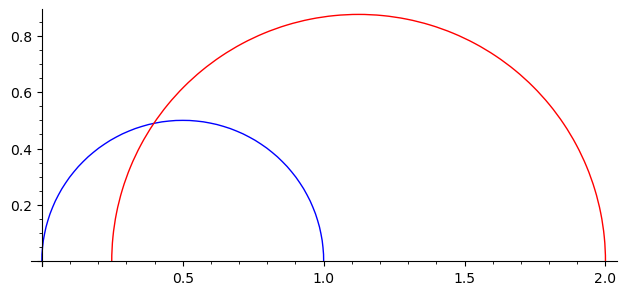

In [24]:
g0.plot(color='blue') + g1.plot(color='red')

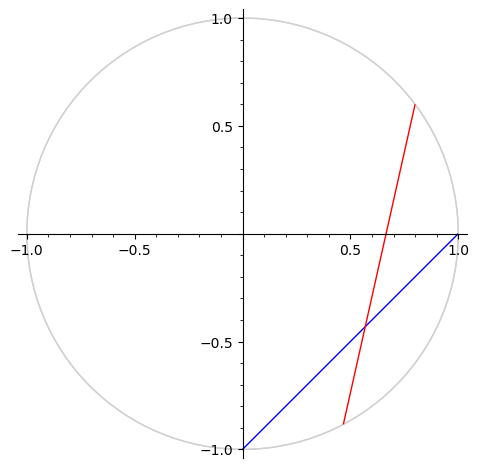

In [25]:
g0.plot('klein', color='blue') + g1.plot('klein', color='red')

In [26]:
# maybe soon?
g0.plot('disk', color='blue') + g1.plot('disk', color='red')

RuntimeError: ("Failed to render hyperbolic path [HyperbolicPathPlotCommand(code='MOVETO', target=0), HyperbolicPathPlotCommand(code='LINETO', target=1.00000000000000)]", NotImplementedError('cannot determine coordinates in this model yet'))

In [27]:
p = g0.intersection(g1)

In [28]:
p.coordinates('klein')

(-480/15193*cbrt3^2 - 2000/15193*cbrt3 + 11924/15193,
 -480/15193*cbrt3^2 - 2000/15193*cbrt3 - 3269/15193)

In [29]:
# computing coordinates in the upper half plane requires square-root...
p.coordinates('half_plane')

ValueError: square root of 308800/230827249*cbrt3^2 + 33698400/230827249*cbrt3 + 70279112/230827249 not in Number Field in cbrt3 with defining polynomial x^3 - 2 with cbrt3 = 1.259921049894873?

In [ ]:
# we can move to a ring that do contain all square roots of our base ring if needed
p.change_ring(AA).coordinates('half_plane')

In [41]:
g2 = H2.geodesic(p, 1/2)

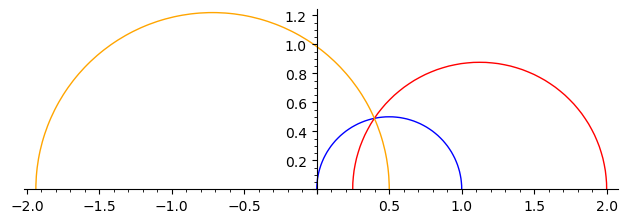

In [42]:
g0.plot(color='blue') + g1.plot(color='red') + g2.plot(color='orange')

## Veech Surfaces & Iso-Delaunay Tessellations

(for Iso-Delaunay tessellation, see [sage-flatsurf#163](https://github.com/flatsurf/sage-flatsurf/pull/163))

In [49]:
from flatsurf import polygons, similarity_surfaces, GL2ROrbitClosure

In [52]:
T = polygons.triangle(1, 4, 7)
S = similarity_surfaces.billiard(T).minimal_cover('translation')
S = S.erase_marked_points()
O = GL2ROrbitClosure(S)

In [ ]:
O.decompositions(10)

In [56]:
d = next(O.decompositions(10))

In [57]:
# the direction is completely periodic
d

FlowDecomposition with 4 cylinders, 0 minimal components and 0 undetermined components

In [63]:
# one can check for parabolicity... though we get a tribool
d.parabolic()

In [ ]:
bool(d.parabolic())

## Strata & Orbit Closures

In [4]:
from flatsurf import similarity_surfaces, polygons
from surface_dynamics import AbelianStratum

In [6]:
T = polygons.triangle(3, 4, 13)
S = similarity_surfaces.billiard(T).minimal_cover('translation')
H = S.stratum()

In [7]:
print(H)

H_8(12, 2, 0^4)


In [10]:
S0 = S.erase_marked_points()
H0 = S0.stratum()
print(H0)

H_8(12, 2)


In [11]:
print(H.dimension(), H0.dimension())

21 17


## Veering Triangulations

- [M. Bell, V. Delecroix, V. Gadre, R. Gutiérrez-Romo, Saul Schleimer  arXiv:1909.00890](https://arxiv.org/abs/1909.00890)
- [B. Zykoski arXiv:2206.04143](https://arxiv.org/abs/2206.04143)

In [2]:
# not by default in the flatsurf stack... but soon
%pip install git+https://github.com/flatsurf/veerer

  Cloning https://github.com/flatsurf/veerer to /tmp/pip-req-build-p1n3rphs
  Running command git clone --filter=blob:none --quiet https://github.com/flatsurf/veerer /tmp/pip-req-build-p1n3rphs
  Resolved https://github.com/flatsurf/veerer to commit b98a9599272534b8fc9d97fb75a066c32253b131
  Preparing metadata (setup.py) ... done
  Created wheel for veerer: filename=veerer-0.1b0-cp39-cp39-linux_x86_64.whl size=232279 sha256=a6664d89bb912661a36f43789479b658d742dff7b5ddb704fe778025ac8db514
  Stored in directory: /tmp/pip-ephem-wheel-cache-c3y47fbe/wheels/c5/91/bc/96eb8c4099991d554ba5e113070091a2b945a0006190aeb7e7
Successfully built veerer
Note: you may need to restart the kernel to use updated packages.


In [6]:
from veerer import VeeringTriangulation
from surface_dynamics import AbelianStratum

In [7]:
H2 = AbelianStratum(2)
vt = VeeringTriangulation.from_stratum(H2)

In [8]:
vt

VeeringTriangulation("(0,6,~5)(1,8,~7)(2,7,~6)(3,~1,~8)(4,~2,~3)(5,~0,~4)", "RRRBBBBBB")

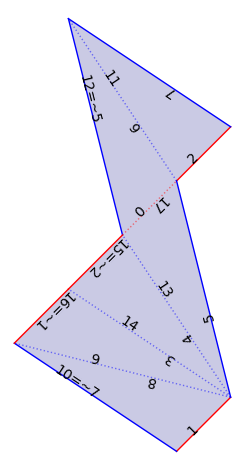

In [10]:
vt.flat_structure_middle().plot()